In [18]:
using FFTW
using Plots

In [20]:
#create a simple signal with two frequencies
dt = 0.001
t = 0:dt:1
f_clean = sin.(2π*50*t) .+ sin.(2π*120*t)
f = f_clean .+ 2.5 .* randn(length(t))

1001-element Vector{Float64}:
  2.120597590276905
  2.9810806104966185
  3.458162399249283
  3.502417653665638
  0.9072273170350043
  0.515967880235589
  0.2403858580509346
  0.46211049683673006
 -2.172576351428995
  3.234690753967179
  5.26968208342042
 -0.5039808237610093
  2.5995658850156236
  ⋮
  2.3028925767370945
 -0.8953596355266576
 -1.4948288958800169
  2.8231663353786787
  0.7726787252813789
 -1.6423441693345957
  1.1352056193036757
 -0.5613122282979243
  1.1118613402012074
 -2.1196166609670155
 -2.307413048419308
  1.819563965760989

In [22]:
#compute the Fast Fourier Transform (FFT)
n = length(t)
fhat = fft(f)
PSD = abs.(fhat).^2 / n 
freq = (1/(dt*n)) .* (0:n-1)
L = div(n, 2)

500

In [23]:
#PSD to filter out noise
indices = PSD[1:L] .> 100
indices_full = vcat(indices, [true], reverse(indices))
PSDclean = PSD .* indices_full
fhat_clean = fhat .* indices_full

1001-element Vector{ComplexF64}:
  0.0 + 0.0im
  0.0 + 0.0im
  0.0 - 0.0im
 -0.0 + 0.0im
  0.0 + 0.0im
 -0.0 + 0.0im
 -0.0 - 0.0im
  0.0 - 0.0im
  0.0 - 0.0im
  0.0 + 0.0im
  0.0 + 0.0im
  0.0 - 0.0im
 -0.0 + 0.0im
      ⋮
 -0.0 - 0.0im
  0.0 + 0.0im
  0.0 - 0.0im
  0.0 - 0.0im
  0.0 + 0.0im
  0.0 + 0.0im
 -0.0 + 0.0im
 -0.0 - 0.0im
  0.0 - 0.0im
 -0.0 - 0.0im
  0.0 + 0.0im
  0.0 - 0.0im

In [24]:
# inverse signal
f_cleaned = real(ifft(fhat_clean))

1001-element Vector{Float64}:
  0.09362233278775707
  0.6672725976115295
  0.7126376251437175
  0.7336722071790377
  0.28133242677244436
  0.10825461997053829
 -0.16986836078268966
  0.07458400675852976
  0.18745000915398574
  0.5575191590962219
  0.4294685065946459
  0.3123198392213837
 -0.2968794382117379
  ⋮
 -0.14143987549646517
 -0.33257217202385375
 -0.5124804731447332
 -0.2073800849331018
 -0.08027599746290727
  0.19016922568508768
 -0.029067010232739516
 -0.19524783184498598
 -0.677560805821689
 -0.7465985365399932
 -0.793540812880534
 -0.2850949088486448

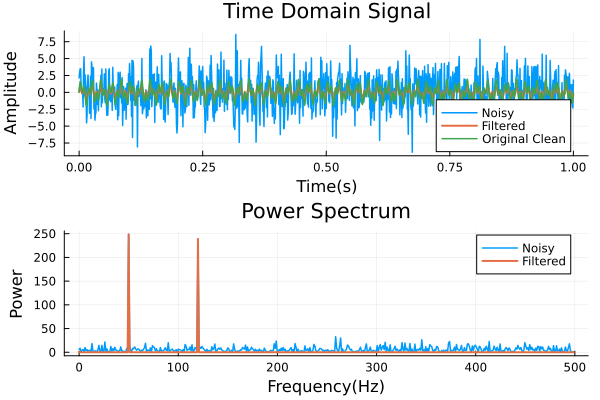

In [25]:
p1 = plot(t, f, label = "Noisy", lw = 1.5, title = "Time Domain Signal", xlabel = "Time(s)", ylabel="Amplitude")
plot!(p1, t, f_cleaned, label="Filtered", lw=2)
plot!(p1, t, f_clean, label="Original Clean", lw=1.5)

p2 = plot(freq[1:L], PSD[1:L], label="Noisy", lw=1.5, title="Power Spectrum", xlabel="Frequency(Hz)", ylabel="Power")
plot!(p2, freq[1:L], PSDclean[1:L], label="Filtered", lw=2)

plot(p1, p2, layout = (2, 1))